# Histogram Equalization and Structural Similarity Index | ENGS 89

Complied and Edited by William L. Roussell

Much of this code is recycled from:
https://github.com/torywalker/histogram-equalizer/blob/master/HistogramEqualization.ipynb
and
https://scikit-image.org/docs/dev/auto_examples/transform/plot_ssim.html

In [1]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from skimage import data, img_as_float
from skimage import measure

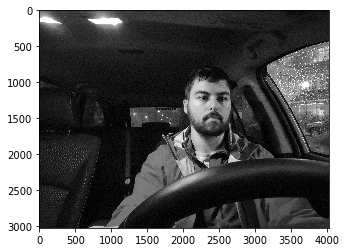

In [2]:
img = Image.open('Downloads/testImage.jpg').convert("L")
img = np.asarray(img)
img1 = img
plt.imshow(img, cmap='gray')
plt.show()

(array([ 843071.,  943637., 1100331., 1145207., 1133614., 1003403.,
         803696.,  602561.,  478423.,  400205.,  408159.,  272766.,
         210995.,  181767.,  172917.,  173239.,  170744.,  153799.,
         138923.,  124807.,  132249.,  109769.,  147433.,  190788.,
         133815.,  104581.,   88278.,   80502.,   74181.,   64384.,
          65093.,   46645.,   42856.,   41043.,   41131.,   41288.,
          41498.,   39928.,   42953.,   39665.,   33024.,   14974.,
          11756.,   12002.,    9958.,    6292.,    4398.,    3837.,
           3996.,   62187.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patc

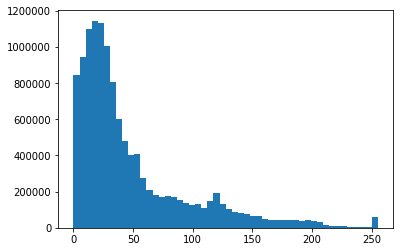

In [3]:
# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)

In [4]:
# formula for creating the histogram
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

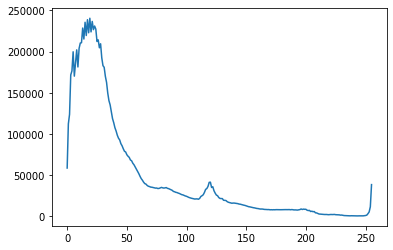

In [5]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)

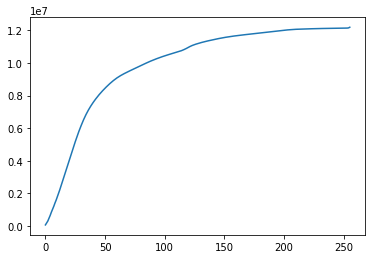

In [6]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

In [7]:
# formula to calculate cumulation sum
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

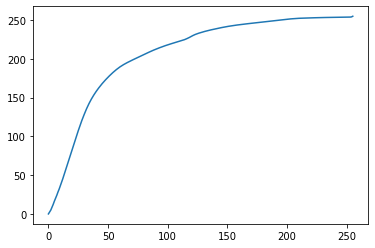

In [8]:
# re-normalize cumsum values to be between 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs)

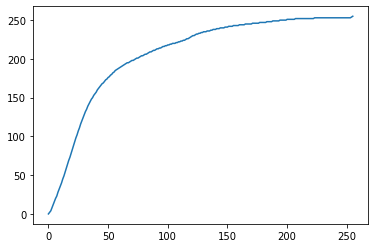

In [9]:
# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

(array([295066., 171687., 176591., 369926., 186105., 202044., 181339.,
        414321., 210695., 228527., 215211., 235527., 219466., 238653.,
        222798., 240414., 223876., 236557., 226573., 230979., 439505.,
        214138., 204584., 209451., 192323., 363830., 169973., 312336.,
        140464., 262379., 340182., 202260., 276163., 247071., 226215.,
        272362., 234603., 232671., 260970., 206988., 309912., 239117.,
        224094., 247875., 215425., 248715., 245305., 243665., 238795.,
        245042.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

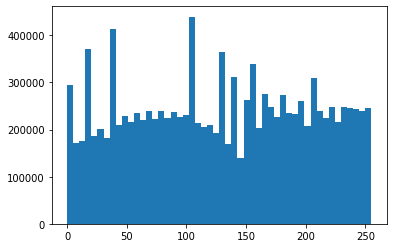

In [10]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=50)

In [11]:
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)
img2 = img_new
img_new

array([[226, 223, 220, ..., 111, 128, 135],
       [222, 220, 218, ...,  98, 107, 107],
       [220, 217, 218, ...,  83,  83,  83],
       ...,
       [162, 142, 111, ..., 155, 157, 160],
       [ 88, 107,  93, ..., 157, 162, 153],
       [ 28,  83,  88, ..., 174, 180, 166]], dtype=uint8)

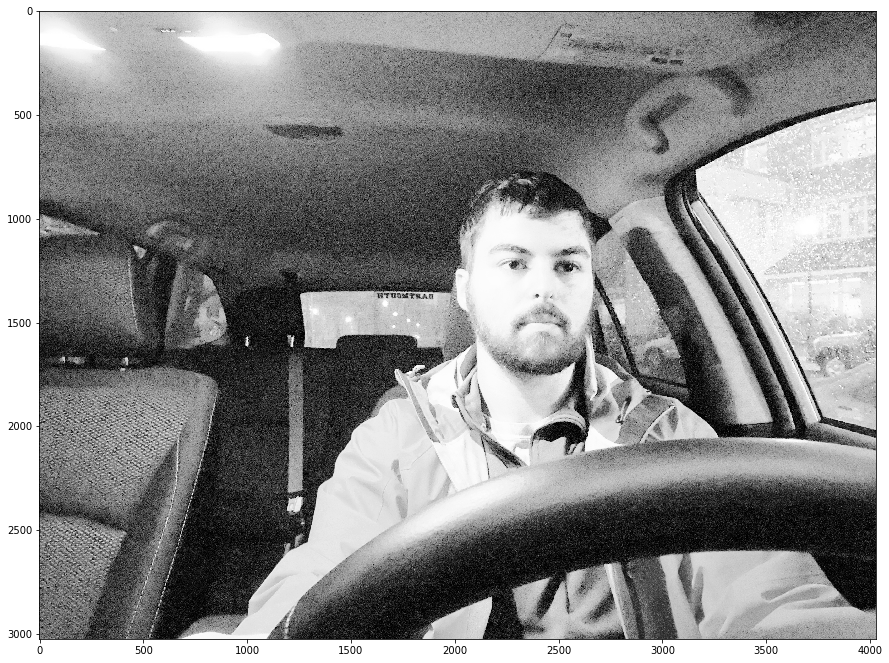

In [12]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

#fig.add_subplot(1,2,1)
#plt.imshow(img, cmap='gray')

# display the new image
#fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)

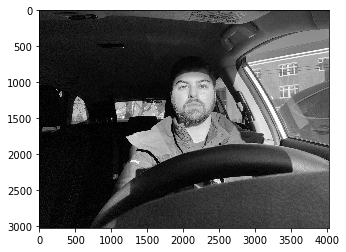

In [13]:
imgd = Image.open('Downloads/testImage2.jpg').convert("L")
imgd = np.asarray(imgd)
img3 = imgd
plt.imshow(imgd, cmap='gray')
plt.show()

(array([1168181., 1135274.,  876824.,  699076.,  576207.,  507342.,
         438269.,  383648.,  319339.,  275830.,  340866.,  299362.,
         308283.,  317407.,  305512.,  273421.,  230524.,  189134.,
         164947.,  150608.,  165422.,  133481.,  135703.,  139481.,
         163132.,  159616.,  139520.,  193998.,  174178.,  168578.,
         185738.,  151870.,  168741.,  195260.,  162158.,  122642.,
          94836.,   75967.,   66449.,   77138.,   66640.,   45392.,
          47882.,   56921.,   31815.,   14774.,   15354.,   24480.,
          19193.,   36355.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patc

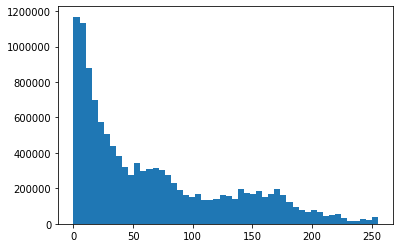

In [14]:
# put pixels in a 1D array by flattening out img array
flatd = imgd.flatten()

# show the histogram
plt.hist(flatd, bins=50)

In [15]:
# formula for creating the histogram
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

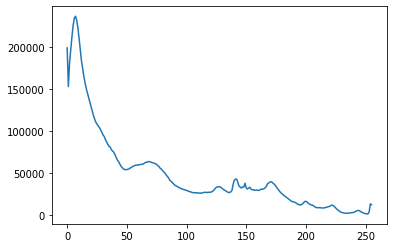

In [16]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

histd = get_histogram(flatd, 256)

plt.plot(histd)

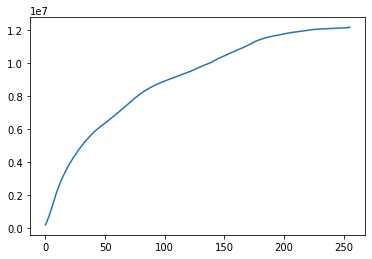

In [17]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
csd = cumsum(histd)

# display the result
plt.plot(csd)

In [18]:
# formula to calculate cumulation sum
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

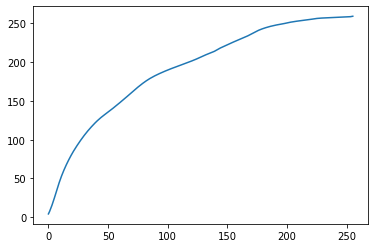

In [19]:
# re-normalize cumsum values to be between 0-255

# numerator & denomenator
njd = (csd - cs.min()) * 255
Nd = csd.max() - csd.min()

# re-normalize the cdf
csd = njd / Nd

plt.plot(csd)

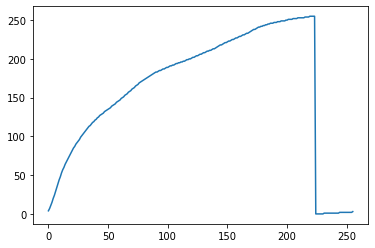

In [20]:
# cast it back to uint8 since we can't use floating point values in images
csd = csd.astype('uint8')

plt.plot(csd)

(array([351213., 153137., 378369., 212187., 225540., 234263., 236549.,
        231862., 222500., 210100., 196535., 357789., 165049., 308124.,
        284522., 134572., 253064., 233234., 325598., 206142., 288605.,
        177670., 248176., 302286., 199276., 232537., 273649., 230573.,
        238949., 181746., 314216., 252612., 183962., 280783., 240491.,
        230884., 226583., 227593., 241444., 223934., 292836., 247407.,
        226537., 235774., 242055., 230850., 231548., 248512., 237252.,
        283679.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

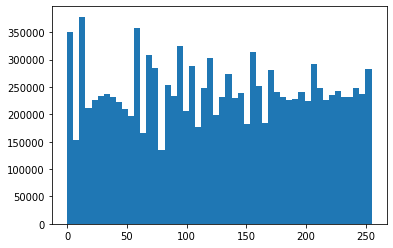

In [21]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_newd = csd[flatd]

# we see a much more evenly distributed histogram
plt.hist(img_newd, bins=50)

In [22]:
# put array back into original shape since we flattened it
img_newd = np.reshape(img_newd, imgd.shape)
img4 = img_newd
img_newd

array([[111,  99, 113, ..., 142, 142, 141],
       [119,  82, 107, ..., 142, 142, 140],
       [107,  85, 114, ..., 144, 144, 141],
       ...,
       [ 60,  39,  44, ..., 166, 170, 172],
       [ 67,  60,  57, ..., 171, 169, 166],
       [ 67,  48,  53, ..., 166, 171, 175]], dtype=uint8)

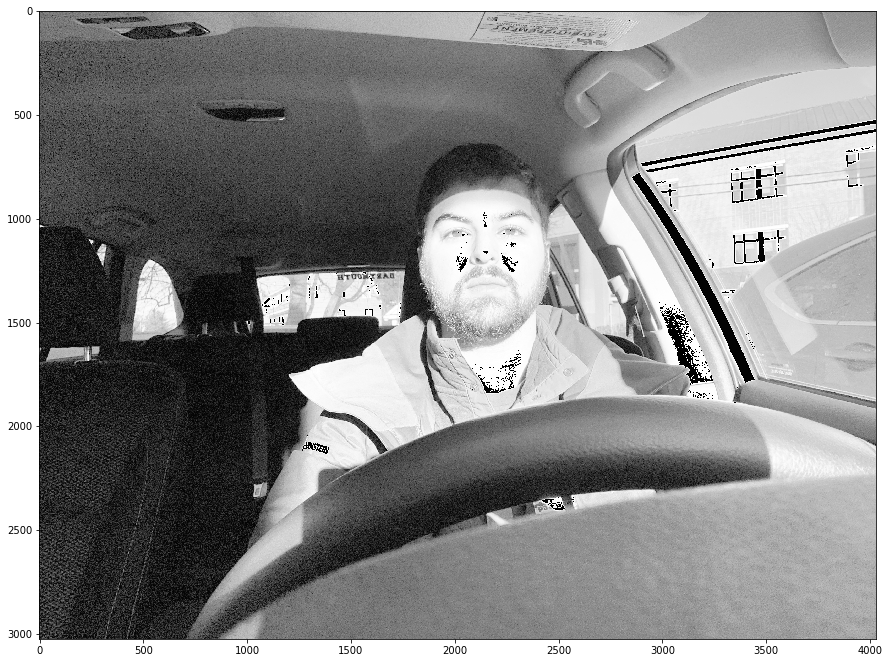

In [23]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

#fig.add_subplot(1,2,1)
#plt.imshow(img, cmap='gray')

# display the new image
#fig.add_subplot(1,2,2)
plt.imshow(img_newd, cmap='gray')

plt.show(block=True)

In [24]:
# Here is our structural similarity index for the images that did not undergo histogram equalization.
s1 = measure.compare_ssim(img1, img3)
s1

0.3177184912917075

In [25]:
# Here is our structural similarity index for the images that did undergo histogram equalization.
s2 = measure.compare_ssim(img2, img4)
s2

0.17520295676016123